In [14]:
%matplotlib inline

In [15]:
import vugrad as vg
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
def experiment(net, epochs, criterion, optimizer, trainloader, testloader):
    acc_list = []
    loss_list = []
    epoch_list = []
    for epoch in range(epochs):  # loop over the dataset multiple times
        print('...validate...')
        epoch_list.append(epoch)
        #validate model during the training epochs
        acc = validate(net, testloader)
        print(acc)
        acc_list.append(acc)

        running_loss = 0.0
        print('...training epoch = ', epoch, '...')
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            loss_list.append(running_loss)
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')
    return acc_list, loss_list, epoch_list


def validate(net, testloader):
    total = 0
    correct = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network 
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [18]:
net = Net()
batch_size = 100
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [19]:
acc_list, loss_list, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.1033
...training epoch =  0 ...
...validate...
0.1401
...training epoch =  1 ...
...validate...
0.1763
...training epoch =  2 ...
...validate...
0.2483
...training epoch =  3 ...
...validate...
0.286
...training epoch =  4 ...
...validate...
0.3335
...training epoch =  5 ...
...validate...
0.3712
...training epoch =  6 ...
...validate...
0.3998
...training epoch =  7 ...
...validate...
0.4233
...training epoch =  8 ...
...validate...
0.4425
...training epoch =  9 ...
...validate...
0.4537
...training epoch =  10 ...
...validate...
0.4714
...training epoch =  11 ...
...validate...
0.4842
...training epoch =  12 ...
...validate...
0.4995
...training epoch =  13 ...
...validate...
0.5022
...training epoch =  14 ...
...validate...
0.5188
...training epoch =  15 ...
...validate...
0.5158
...training epoch =  16 ...
...validate...
0.5232
...training epoch =  17 ...
...validate...
0.5356
...training epoch =  18 ...
...validate...
0.5425
...training epoch =  19 ...
...validate

In [ ]:
print(len(loss_list))
ep_list = []
for i in range(len(loss_list)):
    ep_list.append((i*(epochs/len(loss_list))))
print(len(ep_list))

5000
5000


No handles with labels found to put in legend.


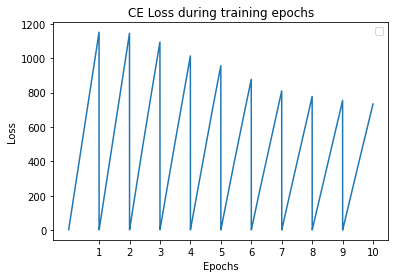

In [ ]:
y1 = loss_list
x1 = ep_list
plt.plot(x1, y1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CE Loss during training epochs')
plt.xticks(np.arange(1, 11, 1))
plt.legend()
plt.savefig('figures/Q11-CE_LOSStorchnn')
plt.show()

In [ ]:
y1 = acc_list
x1 = epoch_list
plt.plot(x1, y1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during training epochs')
plt.xticks(np.arange(1, 11, 1))
plt.legend()
plt.savefig('figures/Q11-ACC_torchnn')
plt.show()